<ipython-input-6-bdce60dcb535>:45: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


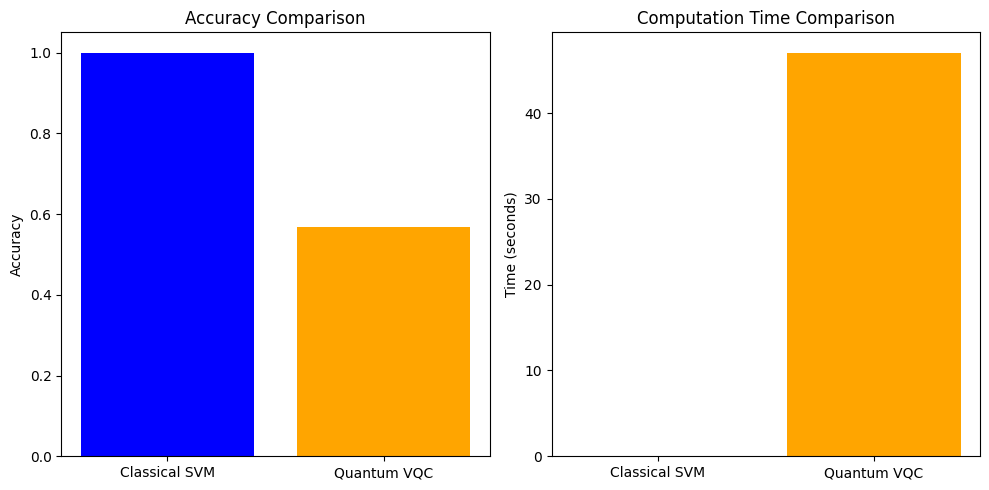

Classical SVM Accuracy: 1.0000, Time: 0.0029 seconds
Quantum VQC Accuracy: 0.5667, Time: 47.0559 seconds


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA

# Step 1: Data Preparation
# Generate a synthetic dataset for binary classification
X, y = datasets.make_classification(n_samples=100, n_features=4, random_state=42)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Classical SVM Classifier
start_time_classical = time.time()
# Train a classical SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
# Predict using the classical classifier
y_pred_classical = svm_classifier.predict(X_test)
# Measure accuracy for classical classifier
accuracy_classical = accuracy_score(y_test, y_pred_classical)
# Measure computation time for classical classifier
time_classical = time.time() - start_time_classical

# Step 3: Quantum Classifier (VQC)
# Define quantum feature map and ansatz
feature_map = ZZFeatureMap(feature_dimension=4, reps=2)
ansatz = TwoLocal(4, rotation_blocks='ry', entanglement_blocks='cz', entanglement='linear')

# Create a Quantum Variational Classifier (VQC)
backend = AerSimulator()
sampler = Sampler()
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=100),
    sampler=sampler
)

# Measure computation time for quantum classifier
start_time_quantum = time.time()
# Train the quantum classifier
vqc.fit(X_train, y_train)
# Predict using the quantum classifier
y_pred_quantum = vqc.predict(X_test)
# Measure accuracy for quantum classifier
accuracy_quantum = accuracy_score(y_test, y_pred_quantum)
# Measure computation time for quantum classifier
time_quantum = time.time() - start_time_quantum

# Step 4: Visualization
# Plotting Accuracy Comparison
plt.figure(figsize=(10, 5))
# Plot accuracy comparison
plt.subplot(1, 2, 1)
algorithms = ['Classical SVM', 'Quantum VQC']
accuracies = [accuracy_classical, accuracy_quantum]
plt.bar(algorithms, accuracies, color=['blue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
# Plot computation time comparison
plt.subplot(1, 2, 2)
times = [time_classical, time_quantum]
plt.bar(algorithms, times, color=['blue', 'orange'])
plt.title('Computation Time Comparison')
plt.ylabel('Time (seconds)')
# Display the plots
plt.tight_layout()
plt.show()

# Output the results
print(f"Classical SVM Accuracy: {accuracy_classical:.4f}, Time: {time_classical:.4f} seconds")
print(f"Quantum VQC Accuracy: {accuracy_quantum:.4f}, Time: {time_quantum:.4f} seconds")